# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [1]:
# naložimo paket
import pandas as pd
import os.path

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline
# naložimo razpredelnico, s katero bomo delali
pot_do_filmov = os.path.join("../../02-zajem-podatkov", "predavanja", "obdelani-podatki", "filmi.csv")
filmi = pd.read_csv(pot_do_filmov)

Poglejmo si podatke.

In [2]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question..."
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [3]:
filmi.sort_values("ocena", ascending=False)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
9902,7286456,Joker,122,2019,9.5,70.0,14789,NaN,R,An original standalone origin story of the ico...
4196,252487,Hababam Sinifi,87,1975,9.4,NaN,34256,NaN,NaN,"Lazy, uneducated students share a very close b..."
9946,7738784,Peranbu,147,2018,9.3,NaN,10415,NaN,NaN,"A single father tries to raise his daughter, w..."
2830,111161,Kaznilnica odrešitve,142,1994,9.3,80.0,2136999,28341469.0,R,Two imprisoned men bond over a number of years...
8284,2170667,Wheels,115,2014,9.3,NaN,17371,NaN,R,Two suicidal paraplegic junkies hustle their w...
...,...,...,...,...,...,...,...,...,...,...
9718,5988370,Reis,108,2017,1.5,NaN,71969,NaN,NaN,A drama about the early life of Recep Tayyip E...
9726,6038600,Smolensk,120,2016,1.4,NaN,7417,NaN,NaN,Inspired by true events of 2010 Polish Air For...
9237,4009460,Saving Christmas,79,2014,1.4,18.0,14365,2783970.0,PG,His annual Christmas party faltering thanks to...
9354,4458206,Kod Adi K.O.Z.,114,2015,1.4,NaN,26817,NaN,NaN,A look at the 17-25 December 2013 corruption s...


Poberite stolpec ocen.

In [4]:
ocene = filmi["ocena"]
ocene

0       6.4
1       7.8
2       7.4
3       8.1
4       8.3
       ... 
9995    6.2
9996    4.3
9997    7.2
9998    5.6
9999    8.3
Name: ocena, Length: 10000, dtype: float64

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [5]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [6]:
zaokrozene = round(ocene)
zaokrozene

0       6.0
1       8.0
2       7.0
3       8.0
4       8.0
       ... 
9995    6.0
9996    4.0
9997    7.0
9998    6.0
9999    8.0
Name: ocena, Length: 10000, dtype: float64

In [7]:
zaokrozene * 2

0       12.0
1       16.0
2       14.0
3       16.0
4       16.0
        ... 
9995    12.0
9996     8.0
9997    14.0
9998    12.0
9999    16.0
Name: ocena, Length: 10000, dtype: float64

Vidimo, da zaokrožene ocene ustrezajo ...

Dodajte zaokrožene vrednosti v podatke.

In [8]:
filmi["zaokrozeno"] = zaokrozene
filmi


,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozeno
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...,6.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",4.0
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question...",7.0
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...,6.0


In [9]:
filmi.head(15)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozeno
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
10,15064,Der letzte Mann,77,1924,8.1,NaN,11260,94812.0,NaN,"An aging doorman, after being fired from his p...",8.0
11,15163,The Navigator,59,1924,7.8,NaN,8320,1483285.0,NaN,Two spoiled rich people find themselves trappe...,8.0
12,15324,Sherlock Jr.,45,1924,8.2,NaN,34452,977375.0,NaN,"A film projectionist longs to be a detective, ...",8.0
13,15648,Bronenosets Potemkin,75,1925,8.0,NaN,48807,50970.0,NaN,In the midst of the Russian Revolution of 1905...,8.0


In [10]:
filmi.tail(15)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozeno
9985,8439854,Lust Stories,120,2018,6.5,NaN,8090,NaN,NaN,Four short films by four of India's biggest di...,6.0
9986,8442644,Organize Isler: Sazan Sarmali,121,2019,6.0,NaN,9042,NaN,NaN,Asim Noyan swindles people with his lies and g...,6.0
9987,8637428,The Farewell,100,2019,8.1,89.0,6892,16877010.0,PG,A Chinese family discovers their grandmother h...,8.0
9988,8663516,Child's Play,90,2019,6.0,48.0,20300,29208403.0,R,A mother gives her 13-year-old son a toy doll ...,6.0
9989,8695030,Mrtvi ne umirajo,104,2019,5.6,54.0,22892,6563605.0,R,The peaceful town of Centerville finds itself ...,6.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9398640,Between Two Ferns: The Movie,82,2019,6.2,58.0,7319,NaN,NaN,Zach Galifianakis and his oddball crew take a ...,6.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",4.0
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question...",7.0
9998,9860728,Falling Inn Love,98,2019,5.6,NaN,7389,NaN,NaN,When city girl Gabriela spontaneously enters a...,6.0


In [11]:
filmi.sort_values("ocena").head(750).tail(50)

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozeno
8001,1901024,True Crimes,92,2016,5.1,24.0,14058,NaN,R,A murder investigation of a slain businessman ...,5.0
8661,2571140,Boss,143,2013,5.1,42.0,9623,NaN,NaN,"A man fights for people's rights. In Delhi, he...",5.0
5233,401815,Tamara,98,2005,5.1,34.0,9241,167723.0,R,"Tamara, an unattractive girl, who is picked on...",5.0
5553,443649,"10,000 BC",109,2008,5.1,34.0,120902,94784201.0,PG-13,"In the prehistoric past, D'Leh is a mammoth hu...",5.0
7825,1758810,Snežak,119,2017,5.1,23.0,50188,6670765.0,R,Detective Harry Hole investigates the disappea...,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8741,2762334,Main Tera Hero,128,2014,5.2,NaN,6842,274579.0,NaN,Sreenath Prasad aka Seenu is the most notoriou...,5.0
2628,107563,The Meteor Man,100,1993,5.2,NaN,7288,8023147.0,PG,A high school teacher from a troubled inner ci...,5.0
6231,859163,Mumija: grobnica zmajskega cesarja,112,2008,5.2,31.0,143034,102491776.0,PG-13,"In the Far East, Alex O'Connell, the son of fa...",5.0
7721,1699231,Quarantine 2: Terminal,86,2011,5.2,NaN,17518,NaN,R,A plane is taken over by a mysterious virus. W...,5.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [12]:
mali_filmi = filmi[["naslov", "leto", "glasovi"]].copy()
mali_filmi["zaokrozene ocene"] = zaokrozene

### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [13]:
prej_mask = filmi["leto"] < 1930
potem_mask = filmi["leto"] > 2017
dobra_ocena = filmi["ocena"] > 6.4
prej_ali_potem = (prej_mask | potem_mask) & dobra_ocena
izbrani_filmi = filmi[prej_ali_potem]
izbrani_filmi


,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozeno
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.8,92.0,13031,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.4,NaN,8700,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
5,12364,Körkarlen,100,1921,8.1,NaN,9106,NaN,NaN,"On New Year's Eve, the driver of a ghostly car...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9990,8772262,Midsommar,147,2019,7.5,72.0,39422,27331977.0,R,A couple travels to Sweden to visit a rural ho...,8.0
9992,8983202,Kabir Singh,173,2019,7.4,NaN,17499,NaN,NaN,Kabir Singh is a remake of a Telugu movie Arju...,7.0
9994,9052870,Chhichhore,143,2019,8.6,NaN,6719,898575.0,NaN,Following a group of friends from university a...,9.0
9997,9495224,Black Mirror: Bandersnatch,90,2018,7.2,NaN,96998,NaN,NaN,"In 1984, a young programmer begins to question...",7.0


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [14]:
def kratki_naslov(ime, max_besed = 2):
    return len(ime.split()) <= max_besed

kratki_naslov("Forrest Gump")

kratka_imena = filmi["naslov"].apply(kratki_naslov)
res_dobri = filmi["ocena"] > 8

filmi[kratka_imena & res_dobri]

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozeno
4,12349,The Kid,68,1921,8.3,NaN,100210,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0
5,12364,Körkarlen,100,1921,8.1,NaN,9106,NaN,NaN,"On New Year's Eve, the driver of a ghostly car...",8.0
12,15324,Sherlock Jr.,45,1924,8.2,NaN,34452,977375.0,NaN,"A film projectionist longs to be a detective, ...",8.0
14,15864,Zlata mrzlica,95,1925,8.2,NaN,91091,5450000.0,NaN,A prospector goes to the Klondike in search of...,8.0
15,15881,Greed,140,1924,8.1,NaN,8374,161800.0,NaN,The sudden fortune won from a lottery fans suc...,8.0
...,...,...,...,...,...,...,...,...,...,...,...
9973,8239946,Tumbbad,104,2018,8.2,NaN,15677,NaN,NaN,A mythological story about a goddess who creat...,8.0
9976,8267604,Capharnaüm,126,2018,8.4,75.0,27308,1661096.0,R,While serving a five-year sentence for a viole...,8.0
9987,8637428,The Farewell,100,2019,8.1,89.0,6892,16877010.0,PG,A Chinese family discovers their grandmother h...,8.0
9994,9052870,Chhichhore,143,2019,8.6,NaN,6719,898575.0,NaN,Following a group of friends from university a...,9.0


### Histogrami

Združite filme po ocenah in jih preštejte.

In [15]:
frekvenca_ocen = filmi.groupby("zaokrozeno").size()
frekvenca_ocen

zaokrozeno
1.0        4
2.0       42
3.0       52
4.0      230
5.0      853
6.0     3193
7.0     3521
8.0     2034
9.0       70
10.0       1
dtype: int64

Naredite stolpični diagram teh podatkov.

<AxesSubplot:xlabel='zaokrozeno'>

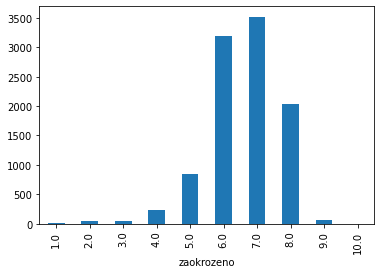

In [16]:

frekvenca_ocen.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

In [17]:
 # for j in range (10 ** 13):
 #   pass

#kernel interrupt

<AxesSubplot:xlabel='leto'>

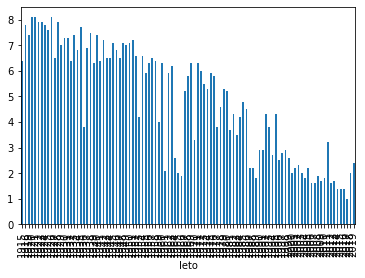

In [18]:
avg = filmi.groupby("leto")["ocena"].min()
avg.plot.bar()

array([[<AxesSubplot:title={'center':'ocena'}>]], dtype=object)

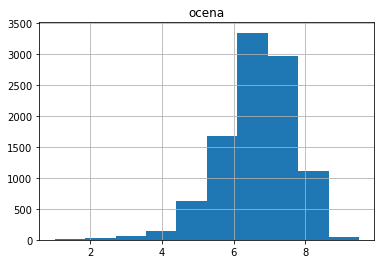

In [19]:
filmi[["ocena"]].hist()

### Izris povprečne dolžine filma glede na leto

<AxesSubplot:xlabel='leto'>

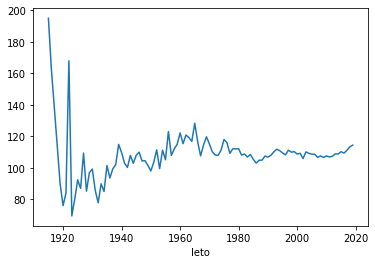

In [20]:
povp = filmi.groupby("leto")["dolzina"].mean()
povp.plot()

### Izris skupnega zasluzka za posamezno leto

<AxesSubplot:xlabel='leto'>

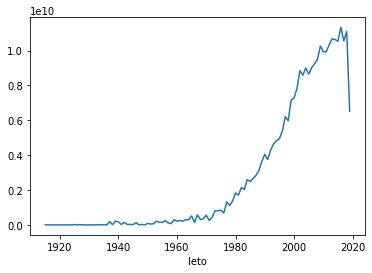

In [21]:
zas = filmi.groupby("leto")["zasluzek"].sum()
zas.plot()

In [22]:
import matplotlib.pyplot as plt  #za sheanjevanje grafov
plt.savefig("neki.pdf")

<Figure size 432x288 with 0 Axes>